In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
%matplotlib inline

In [21]:
df = pd.read_csv('./data/telecom_churn.csv')

In [22]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [14]:
df.shape

(3333, 20)

### Whole DataSet Visualisation

In [23]:
df['International plan']=df['International plan'].map({'Yes':1, 'No':0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes':1, 'No':0})

In [24]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


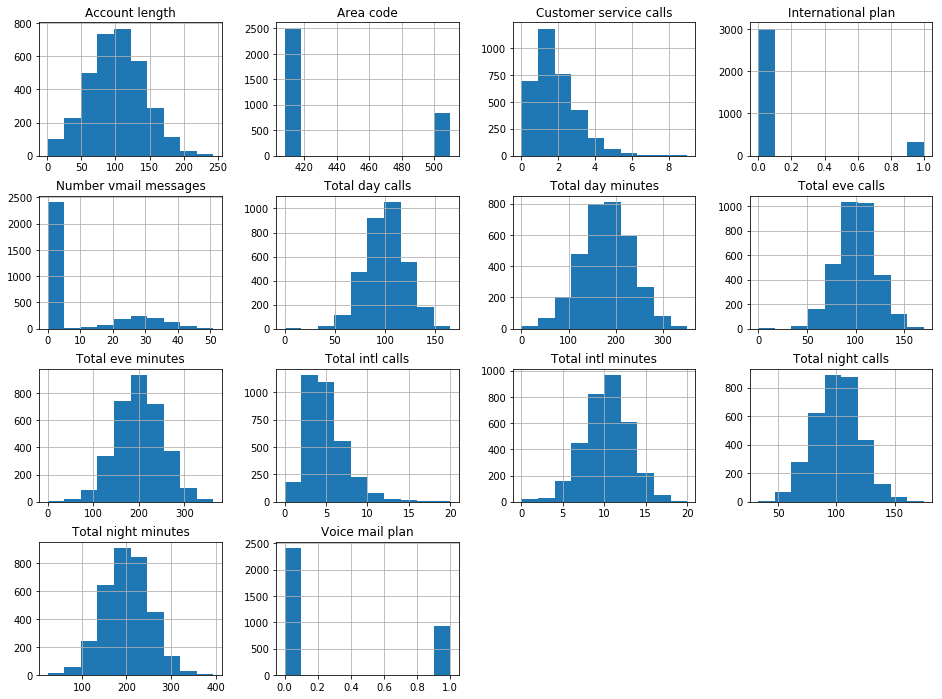

In [42]:
plt.rcParams['figure.figsize']=(16,12)
df.drop(['State','Churn'],axis=1).hist();

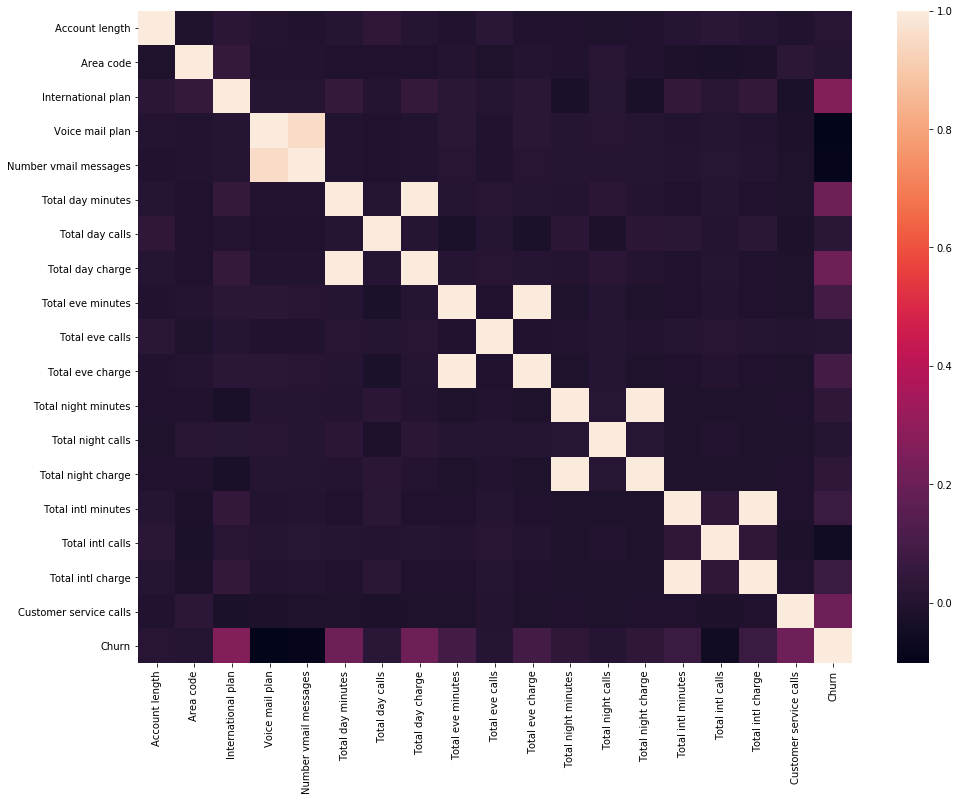

In [26]:
sns.heatmap(df.corr())

In [30]:
df.drop([feat_name for feat_name in df.columns if 'charge' in feat_name],axis=1, inplace=True)

In [31]:
df.shape

(3333, 16)

## Features one at a time

### Numeric

In [33]:
df['Total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

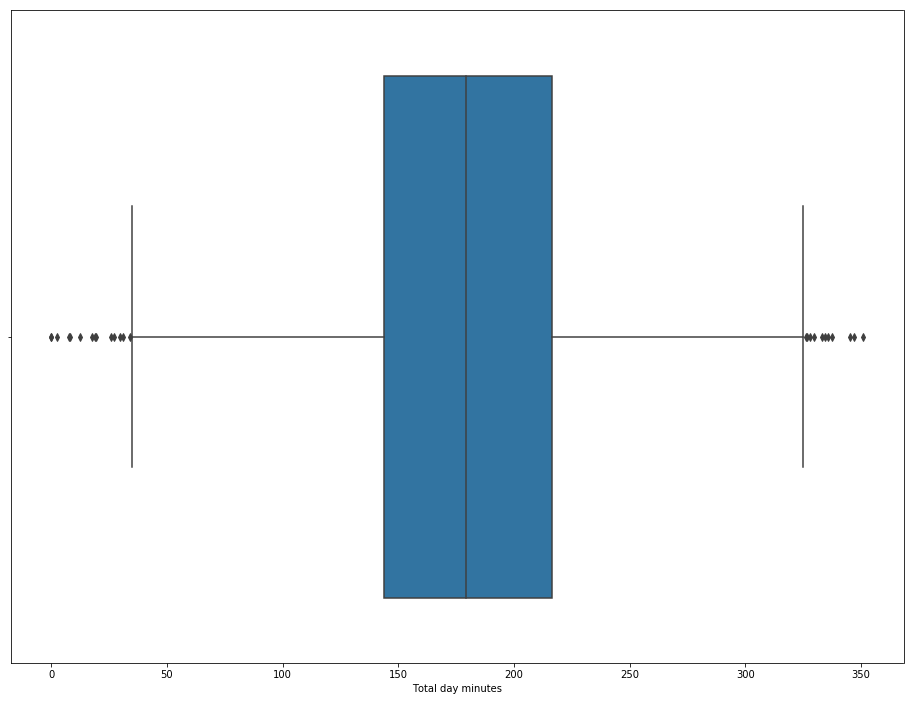

In [34]:
sns.boxplot(x='Total day minutes',data=df)

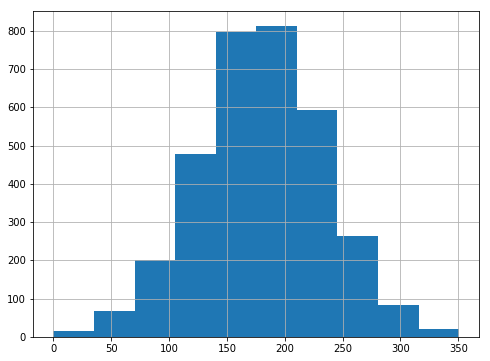

In [43]:
plt.rcParams['figure.figsize'] =(8,6)
df['Total day minutes'].hist();

### Categorical 

In [36]:
df['State'].nunique()

51

In [37]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [39]:
df['Churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

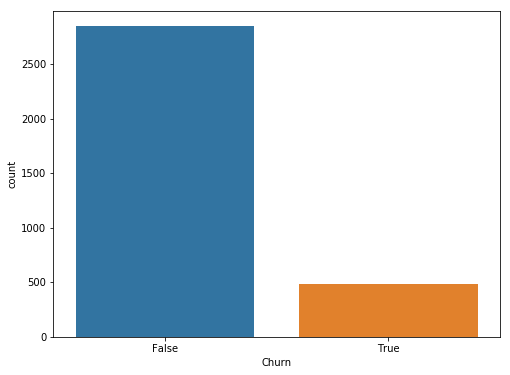

In [40]:
sns.countplot(x='Churn',data=df);

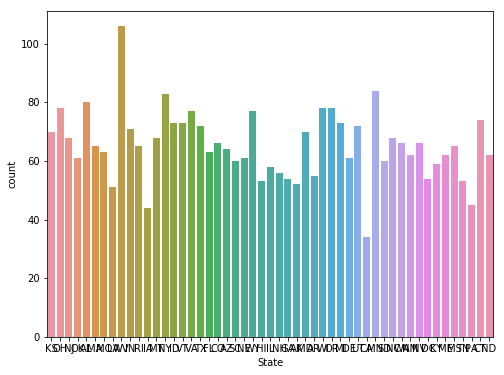

In [45]:
sns.countplot(x='State',data=df);

### Interaction between features

#### Numeric-Numeric

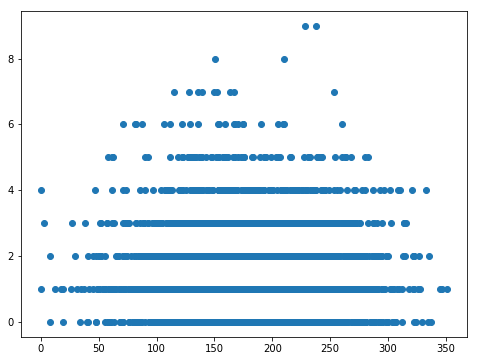

In [47]:
plt.scatter(df['Total day minutes'],
           df['Customer service calls']);

In [48]:
pd.crosstab(df.Churn, df['Customer service calls'])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0
True,92,122,87,44,76,40,14,5,1,2


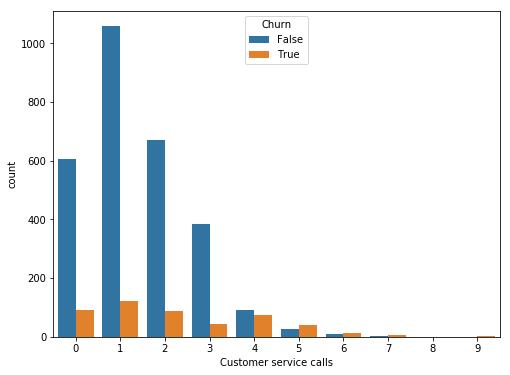

In [50]:
sns.countplot(x='Customer service calls',hue='Churn',data=df);

In [51]:
from sklearn.manifold import TSNE

In [52]:
df.shape

(3333, 16)

In [53]:
state = df['State']
df.drop('State',axis=1,inplace=True)

In [54]:
df.shape

(3333, 15)

In [55]:
tsne = TSNE(random_state=17)

In [56]:
%%time
x_repr_churn = tsne.fit_transform(df)

Wall time: 2min 13s


In [57]:
x_repr_churn.shape

(3333, 2)

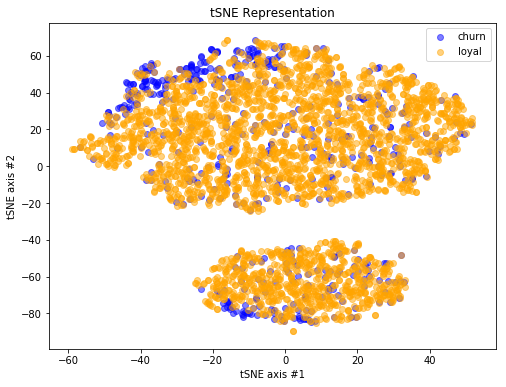

In [67]:
plt.rcParams['figure.figsize'] =(8,6)
plt.scatter(x_repr_churn[df.Churn==1,0],x_repr_churn[df.Churn==1,1],alpha=0.5,c='blue', label='churn');
plt.scatter(x_repr_churn[df.Churn==0,0],x_repr_churn[df.Churn==0,1], alpha=0.5, c='orange', label='loyal');
plt.xlabel('tSNE axis #1');
plt.ylabel('tSNE axis #2');
plt.title('tSNE Representation');
plt.legend();
plt.savefig('churn_tsne.png',dpi=300);

<img src='churn_tsne.png'>

In [69]:
df.groupby('Churn')['Total day minutes',
                   'Customer service calls'].mean()

,Total day minutes,Customer service calls
Churn,,
False,175.175754,1.449825
True,206.914079,2.229814


In [70]:
import numpy as np
df.groupby('Churn')['Total day minutes',
                   'Customer service calls'].agg([np.median, np.mean])

Total day minutes             Customer service calls          
                 median        mean                 median      mean
Churn                                                               
False             177.2  175.175754                      1  1.449825
True              217.6  206.914079                      2  2.229814

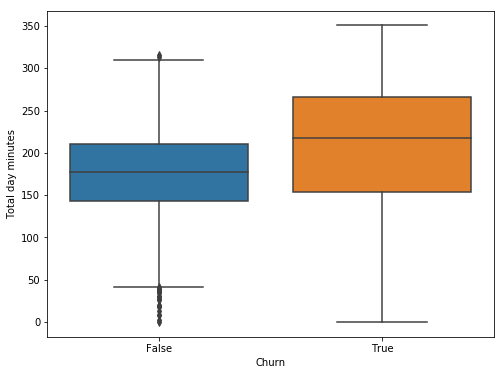

In [72]:
sns.boxplot(x='Churn',y='Total day minutes',data=df);